# 2D Triangular Meshes

In [320]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

import niceplots

plt.style.use(niceplots.get_style())
colors = niceplots.get_colors_list()

## Part 1: Node coordinates

In [321]:
nodeCoordinates = np.loadtxt("meshes/blade0.node", skiprows=1)
print(nodeCoordinates[:10])

[[-27.000049    -1.237215  ]
 [-27.000049     0.46096024]
 [-27.000049     2.4792453 ]
 [-27.000049     4.87798158]
 [-27.000049     7.728885  ]
 [-23.6831689   -1.237215  ]
 [-23.35562958   0.68898222]
 [-22.96704546   2.97778661]
 [-22.50590944   5.69755045]
 [-21.95854535   8.92951054]]


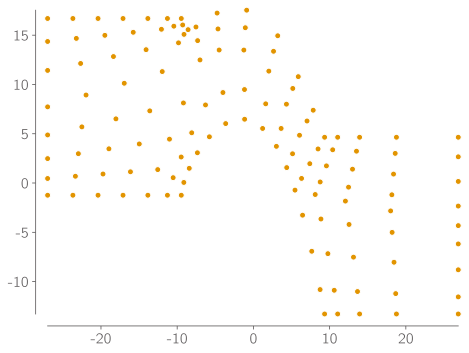

In [322]:
fig, ax = plt.subplots()
ax.plot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], "o", clip_on=False, label="Nodes")
niceplots.adjust_spines(ax)

## Part 2: Node connectivity

The `.elem` file describes how the nodes are connected to form the triangular cells.
Each row in the file contains the indices of the three nodes that form a triangle.

In [323]:
# MAKE SURE TO SUBTRACT 1 FROM THE ELEMENT CONNECTIVITY BECAUSE PYTHON IS 0 INDEXED
nodeConnectivity = np.loadtxt("meshes/blade0.elem", skiprows=1, dtype=int) - 1
print(nodeConnectivity[:10])

[[ 0  5  1]
 [ 5  6  1]
 [ 1  6  2]
 [ 6  7  2]
 [ 2  7  3]
 [ 7  8  3]
 [ 3  8  4]
 [ 8  9  4]
 [ 5 10  6]
 [10 11  6]]


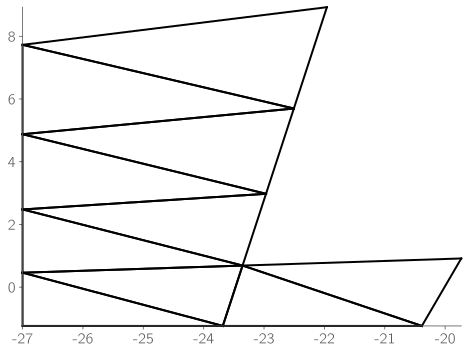

In [324]:
# Naive plotting method
fig, ax = plt.subplots()
for cellNum in range(10):
    for edgeNum in range(3):
        node1 = nodeConnectivity[cellNum, edgeNum]
        node2 = nodeConnectivity[cellNum, (edgeNum + 1) % 3]
        ax.plot(
            [nodeCoordinates[node1, 0], nodeCoordinates[node2, 0]],
            [nodeCoordinates[node1, 1], nodeCoordinates[node2, 1]],
            "-",
            color="k",
            clip_on=False,
        )

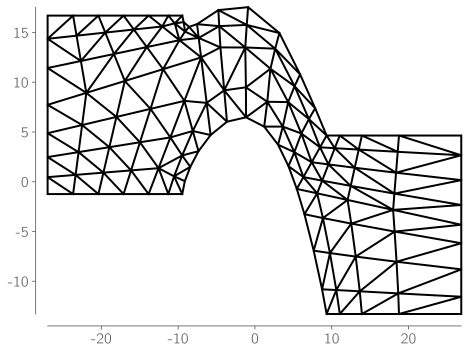

In [325]:
# Smarter plotting method
fig, ax = plt.subplots()
ax.triplot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, color="k", clip_on=False)
niceplots.adjust_spines(ax)

### Computing cell quantities

In [326]:
def computeCellAreas(nodeCoordinates, nodeConnectivity):
    numCells = nodeConnectivity.shape[0]
    cellAreas = np.zeros(numCells)
    node1 = nodeConnectivity[:, 0]
    node2 = nodeConnectivity[:, 1]
    node3 = nodeConnectivity[:, 2]
    x1 = nodeCoordinates[node1, 0]
    x2 = nodeCoordinates[node2, 0]
    x3 = nodeCoordinates[node3, 0]
    y1 = nodeCoordinates[node1, 1]
    y2 = nodeCoordinates[node2, 1]
    y3 = nodeCoordinates[node3, 1]

    cellAreas[:] = np.abs(0.5 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)))

    return cellAreas


def computeCellCentroids(nodeCoordinates, nodeConnectivity):
    numCells = nodeConnectivity.shape[0]
    cellCentroids = np.zeros((numCells, 2))
    node1 = nodeConnectivity[:, 0]
    node2 = nodeConnectivity[:, 1]
    node3 = nodeConnectivity[:, 2]
    x1 = nodeCoordinates[node1, 0]
    x2 = nodeCoordinates[node2, 0]
    x3 = nodeCoordinates[node3, 0]
    y1 = nodeCoordinates[node1, 1]
    y2 = nodeCoordinates[node2, 1]
    y3 = nodeCoordinates[node3, 1]

    cellCentroids[:, 0] = (x1 + x2 + x3) / 3
    cellCentroids[:, 1] = (y1 + y2 + y3) / 3
    return cellCentroids


cellAreas = computeCellAreas(nodeCoordinates, nodeConnectivity)
cellCentroids = computeCellCentroids(nodeCoordinates, nodeConnectivity)

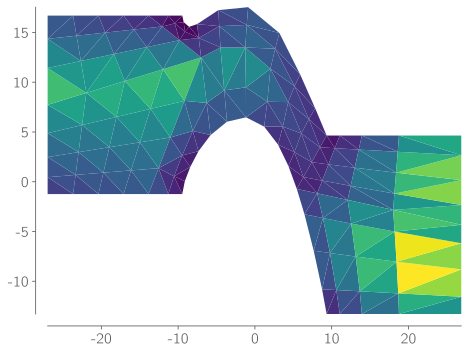

In [327]:
fig, ax = plt.subplots()
ax.tripcolor(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, cellAreas, cmap="viridis")
niceplots.adjust_spines(ax)

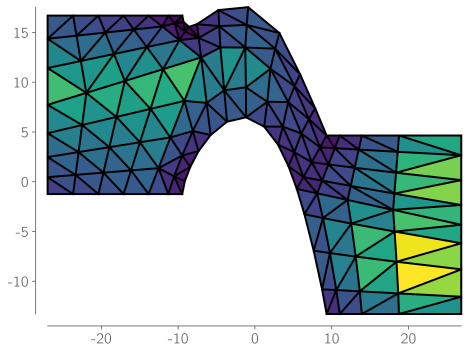

In [328]:
ax.triplot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, color="k", clip_on=False)
fig

## Cell connectivity



In [329]:
cellConnectivity = np.loadtxt("meshes/blade0.connect", skiprows=8, dtype=int)
# Subtract 1 from the cell connectivity because Python is 0 indexed, but not for the negative values that represent the boundary conditions
cellConnectivity[cellConnectivity >= 0] -= 1

Let's use the cell connectivity information to plot lines between a few of the cells and their neighbours.

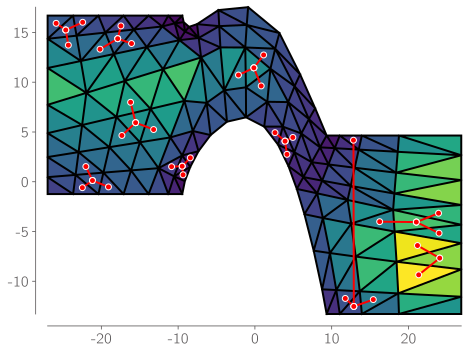

In [330]:
np.random.seed(0)

for ii in range(10):
    cellIndex = np.random.randint(0, cellConnectivity.shape[0])
    centroid = cellCentroids[cellIndex]
    for jj in range(3):
        neighborIndex = cellConnectivity[cellIndex, jj]
        if neighborIndex >= 0:
            neighborCentroid = cellCentroids[neighborIndex]
            ax.plot([centroid[0], neighborCentroid[0]], [centroid[1], neighborCentroid[1]], "r-o")
fig

## Flux computation test case

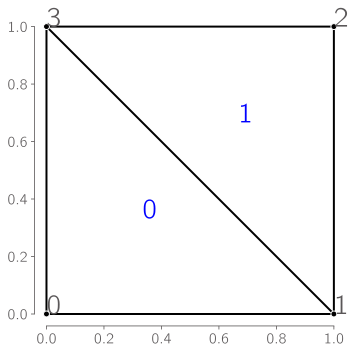

In [331]:
nodeCoordinates = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
nodeConnectivity = np.array([[0, 1, 3], [1, 2, 3]])

cellAreas = computeCellAreas(nodeCoordinates, nodeConnectivity)
cellCentroids = computeCellCentroids(nodeCoordinates, nodeConnectivity)

fig, ax = plt.subplots()
ax.triplot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, color="k", clip_on=False)
ax.plot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], "o", color="k", clip_on=False)

# Label the nodes with their indices
for ii in range(len(nodeCoordinates)):
    ax.annotate(str(ii), (nodeCoordinates[ii, 0], nodeCoordinates[ii, 1]), fontsize=28)

# Label the cells with their indices
for ii in range(len(cellCentroids)):
    ax.annotate(str(ii), (cellCentroids[ii, 0], cellCentroids[ii, 1]), color="b", fontsize=28)

niceplots.adjust_spines(ax)
ax.set_aspect("equal")

To compute fluxes, we need data about the edges in the mesh.

It is useful to split the edges into two sets: interior edges and boundary edges.

Interior edges are those that are shared by two cells, while boundary edges are only part of one cell, because they lie on the boundary of the domain.

Here I am manually creating the data structures that describe the edges, in your project you will need to write code to do this for any mesh.

In [332]:
# each row in this array contains, the indices of the nodes that make up the edge, followed by the index of the left cell and the index of the right cell
# [startNode, endNode, leftCell, rightCell]
interiorEdges = np.array([[1, 3, 0, 1]])

# Each row in the boundary edges array contains the indices of the nodes that make up the edge, followed by the index of the cell that the edge is on and finally the boundary condition type
# [startNode, endNode, (left)Cell, boundaryConditionType]
boundaryEdges = np.array([[3, 0, 0, -1], [0, 1, 0, -1], [2, 3, 1, -2], [1, 2, 1, -2]])

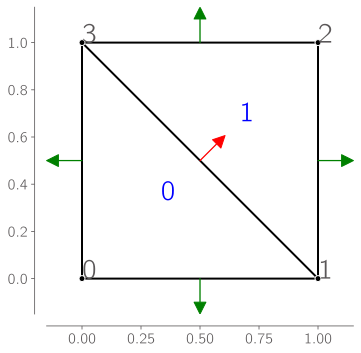

In [333]:
for ii, edge in enumerate(interiorEdges):
    node1 = nodeCoordinates[edge[0]]
    node2 = nodeCoordinates[edge[1]]
    centroid = 0.5 * (node1 + node2)
    edgeVector = node2 - node1
    edgeLength = np.linalg.norm(edgeVector)
    normal = np.array([edgeVector[1], -edgeVector[0]]) / edgeLength

    ax.arrow(
        centroid[0],
        centroid[1],
        normal[0] * 0.1,
        normal[1] * 0.1,
        head_width=0.05,
        head_length=0.05,
        fc="r",
        ec="r",
    )

for ii, edge in enumerate(boundaryEdges):
    node1 = nodeCoordinates[edge[0]]
    node2 = nodeCoordinates[edge[1]]
    centroid = 0.5 * (node1 + node2)
    edgeVector = node2 - node1
    edgeLength = np.linalg.norm(edgeVector)
    normal = np.array([edgeVector[1], -edgeVector[0]]) / edgeLength

    ax.arrow(
        centroid[0],
        centroid[1],
        normal[0] * 0.1,
        normal[1] * 0.1,
        head_width=0.05,
        head_length=0.05,
        fc="g",
        ec="g",
    )
fig

### Freestream preservation test

The freestream presentation test works by setting all the boundary conditions and cell states to be equal to a freestream state.

We then check 2 things:
- The initial residual should be zero
- The residual should remain at zero (and the cell states remain at the freestream) as we march forward in time

Here we perform these tests in a very hardcoded way, your project code will be able to do the same thing in a much more general way.

In [334]:
from flux import FluxFunction


def computeTestCaseResidual(U0, U1, UBoundary, gamma):
    R = np.zeros((2, 4))

    # Left Boundary
    edgeLength = 1
    normal = np.array([-1, 0])
    F, smag = FluxFunction(U0, Uinf, gamma, normal)
    R[0] += F * edgeLength

    # Bottom Boundary
    edgeLength = 1
    normal = np.array([0, -1])
    F, smag = FluxFunction(U0, Uinf, gamma, normal)
    R[0] += F * edgeLength

    # Right Boundary
    edgeLength = 1
    normal = np.array([1, 0])
    F, smag = FluxFunction(U1, Uinf, gamma, normal)
    R[1] += F * edgeLength

    # Top Boundary
    edgeLength = 1
    normal = np.array([0, 1])
    F, smag = FluxFunction(U1, Uinf, gamma, normal)
    R[1] += F * edgeLength

    # Interior edge
    ndiag = np.array([1, 1]) / np.sqrt(2)
    F, smag = FluxFunction(U0, U1, gamma, ndiag)
    R[0] += F * np.sqrt(2)
    R[1] -= F * np.sqrt(2)

    return R, smag

For the first freestream preservation test, we make up a freestream state, set it in both cells, and then check that the residual is zero.

In [335]:
freeStreamState = np.array([0.5, 0.4, 0.8, 2.6])

U0 = Uinf.copy()
U1 = Uinf.copy()

gamma = 1.4

R, _ = computeTestCaseResidual(U0, U1, freeStreamState, gamma)
print(R)

[[ 0.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16  0.00000000e+00  0.00000000e+00]]


And now we will run a simulation for a few thousand timesteps, and check that the residual remains zero and the state doesn't significant;y change.

In [336]:
numTimeSteps = 2000

CFL = 1.0
cellDiameter = 0.3
cellAreas = computeCellAreas(nodeCoordinates, nodeConnectivity)

for _ in range(numTimeSteps):
    R, smag = computeTestCaseResidual(U0, U1, freeStreamState, gamma)
    dt = CFL * cellDiameter / smag

    U0 -= dt * R[0] / cellAreas[0]
    U1 -= dt * R[1] / cellAreas[1]

print(f"Initial state = {freeStreamState}")
print("Final states:")
print(f"U0 = {U0}")
print(f"U1 = {U1}")

print("Final Residuals:")
print(R)

Initial state = [0.5 0.4 0.8 2.6]
Final states:
U0 = [0.5 0.4 0.8 2.6]
U1 = [0.5 0.4 0.8 2.6]
Final Residuals:
[[ 0.00000000e+00  2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16 -4.44089210e-16  0.00000000e+00 -8.88178420e-16]]
